In [3]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261330,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [8]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']

In [10]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261330,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


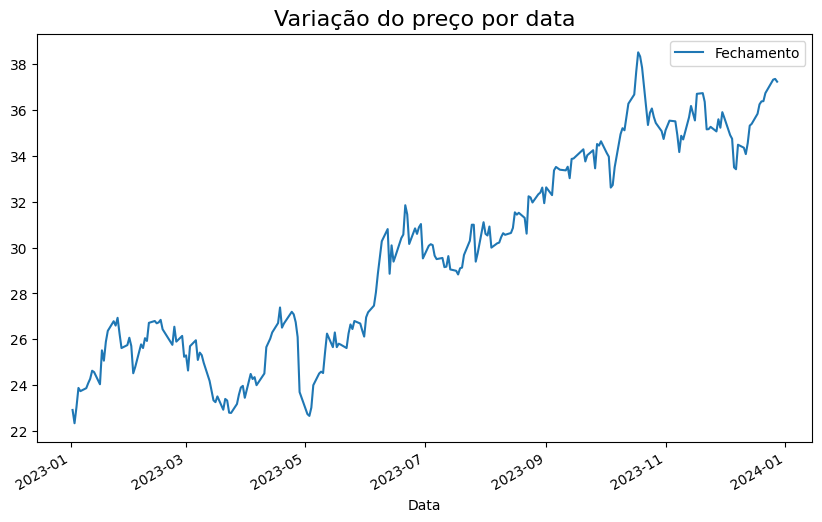

In [13]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [15]:
df = dados.head(60).copy()
# Convertendo o índice em uma coluna de data
df['Data'] = df.index
# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

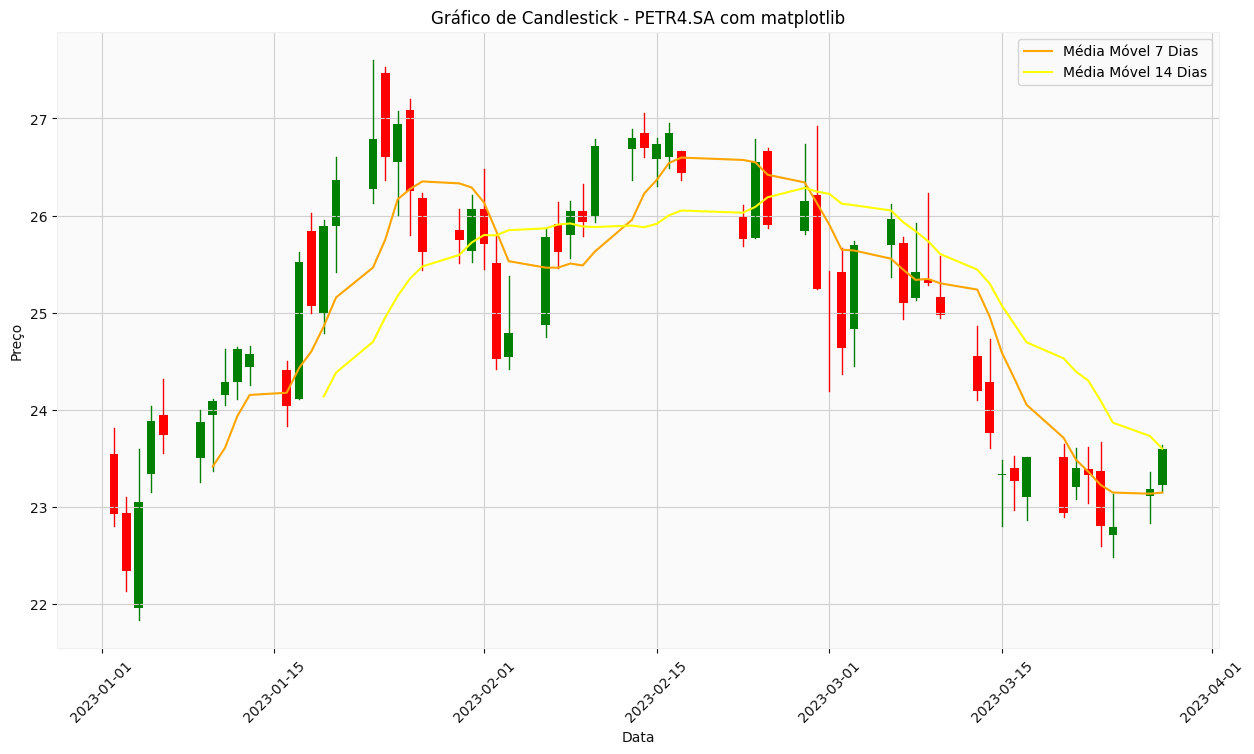

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [29]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [26]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


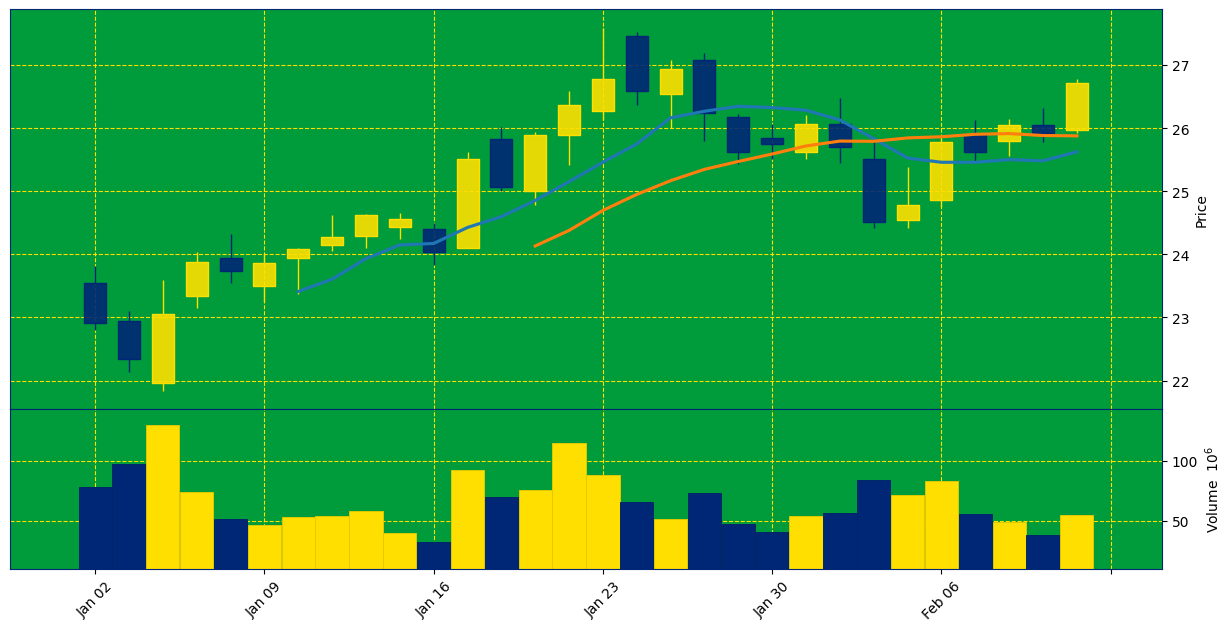

In [31]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='brasil')